In [108]:
import nb_utils
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np 
%matplotlib inline

# Stream function fields

In [100]:
nb_utils.switch_to_qgftle_src_dir()
import util

## Actual stream function
Loading actual stream function

loading sf from  D:\Projects\ml_fluids\QG_FTLE\inputs\dgsf_0p1_128_64_0p1_0p21000_2.0.actual ...
loaded sf!
shape (128, 64, 12000)


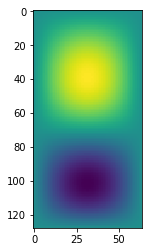

In [32]:
sfactual_filename = "dgsf_0p1_128_64_0p1_0p21000_2.0.actual"
sfactual_fullpath = os.path.join(nb_utils.QG_FTLE_INPUTS_fullpath,sfactual_filename)
sfactual = util.load_sf_field(sf_fullpath=sfactual_fullpath)
plt.imshow(sfactual[:,:,10])

## Estimated stream function
Loading estimated stream function

loading sf from  D:\Projects\ml_fluids\QG_FTLE\inputs\dgsf_0p1_128_64_0p1_0p21000_2.0.est ...
loaded sf!
shape (128, 64, 12002)


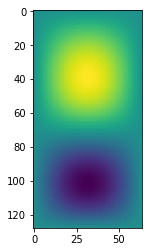

In [4]:
sfest_filename = "dgsf_0p1_128_64_0p1_0p21000_2.0.est"
sfest_fullpath = os.path.join(nb_utils.QG_FTLE_INPUTS_fullpath,sfest_filename)
sfest = util.load_sf_field(sf_fullpath=sfest_fullpath)
plt.imshow(sfest[:,:,10])

## Comparing actual and estimated stream functions over time

In [5]:
from skimage.measure import compare_ssim as ssim

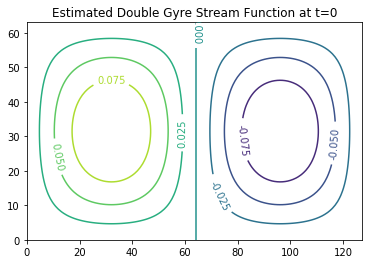

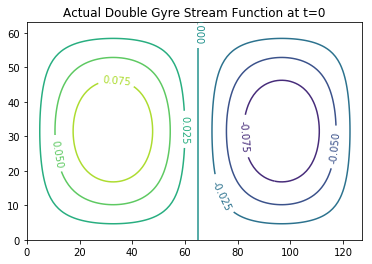

In [43]:
i = 0
nb_utils.contour_cross_section(data=sfest,i=i,title="Estimated Double Gyre Stream Function at t=0")
nb_utils.contour_cross_section(data=sfactual,i=i,title="Actual Double Gyre Stream Function at t=0")


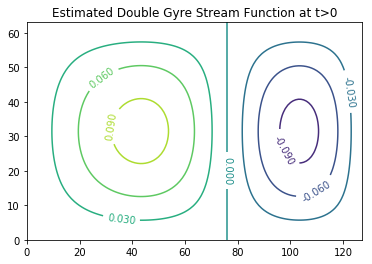

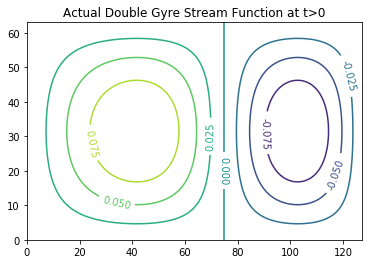

In [42]:
i = 30
nb_utils.contour_cross_section(data=sfest,i=i,title="Estimated Double Gyre Stream Function at t>0")
nb_utils.contour_cross_section(data=sfactual,i=i,title="Actual Double Gyre Stream Function at t>0")

In [91]:
di = 0
ssims = [ssim(sfest[:,:,i], sfactual[:,:,i-di]) for i in range(di,sfactual.shape[-1])]
mses = [ sum(sum((sfest[:,:,i]-sfactual[:,:,i-di])**2))*(1./(sfactual.shape[0]*sfactual.shape[1])) for i in range(di,sfactual.shape[-1])]

Text(0.5, 1.0, 'SSI (Estimated and Actual) DG Stream Function Fields')

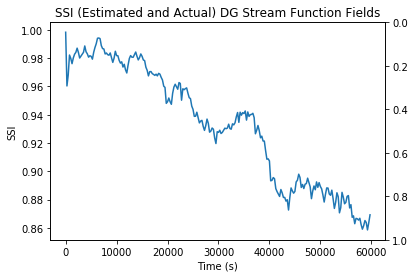

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sample_freq = 50
dt = 0.1

ax2 = ax.twinx()
ax2.invert_yaxis()
ax.plot([i*sample_freq*dt for i in range(di,sfactual.shape[-1],sample_freq)],ssims[::sample_freq])
# ax2.plot([i*sample_freq*dt for i in range(di,sfactual.shape[-1],sample_freq)],mses[::sample_freq])
ax.set_xlabel('Time (s)')
ax.set_ylabel('SSI')
ax.set_title('SSI (Estimated and Actual) DG Stream Function Fields')

# FTLE fields

## Loading FTLE fields

In [148]:
import config
config.FTLE_FIELDS_PATH_DIR
ftle_field_experiment_est = "dgsf_0p1_128_64_0p1_0p21000_2.0.est"
ftle_field_file_fullpath_est = os.path.join(config.FTLE_FIELDS_PATH_DIR, ftle_field_experiment_est)
ftle_est = np.dstack([ np.loadtxt(os.path.join(ftle_field_file_fullpath_est,"FTLE{0}".format(i))) 
                        for i in range(50)])


ftle_field_experiment_actual = "dgsf_0p1_128_64_0p1_0p21000_2.0.actual"
ftle_field_file_fullpath_actual = os.path.join(config.FTLE_FIELDS_PATH_DIR, ftle_field_experiment_actual)
ftle_actual = np.dstack([ np.loadtxt(os.path.join(ftle_field_file_fullpath_actual,"FTLE{0}".format(i))) 
                        for i in range(50)])



Text(0.5, 1.0, 'Actual Double Gyre FTLE at t=0')

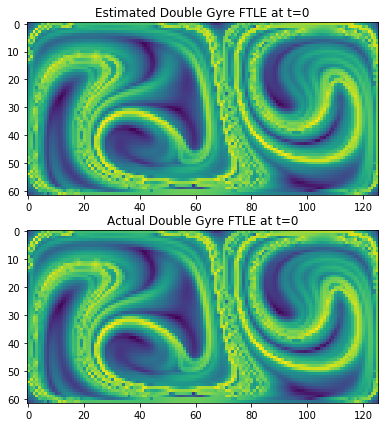

In [149]:
i = 0
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax.imshow(ftle_est[:,:,i])
ax.set_title("Estimated Double Gyre FTLE at t=0")
ax2.imshow(ftle_est[:,:,i])
ax2.set_title("Actual Double Gyre FTLE at t=0")


Text(0.5, 1.0, 'Actual Double Gyre FTLE at t>0')

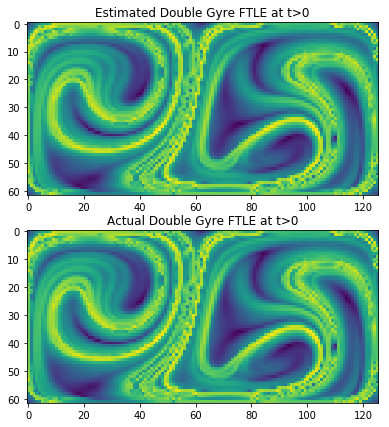

In [154]:
i = 49
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax.imshow(ftle_est[:,:,i])
ax.set_title("Estimated Double Gyre FTLE at t>0")
ax2.imshow(ftle_est[:,:,i])
ax2.set_title("Actual Double Gyre FTLE at t>0")


## Comparing actual and estimated FTLE fields

In [157]:
di = 0
ssims = [ssim(ftle_est[:,:,i], ftle_actual[:,:,i-di]) for i in range(di,ftle_actual.shape[-1])]
mses = [ sum(sum((ftle_est[:,:,i]-ftle_actual[:,:,i-di])**2))*(1./(ftle_actual.shape[0]*ftle_actual.shape[1])) for i in range(di,ftle_actual.shape[-1])]

Text(0.5, 1.0, 'Difference between (Estimated and Actual) DG FTLE Fields')

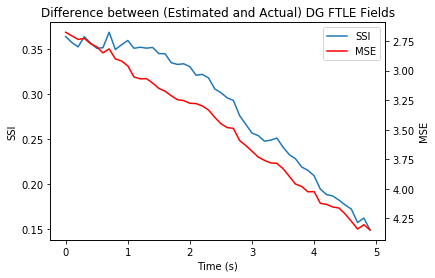

In [166]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sample_freq = 1
dt = 0.1

ax2 = ax.twinx()
ax2.invert_yaxis()
l1 = ax.plot([i*sample_freq*dt for i in range(di,ftle_actual.shape[-1],sample_freq)],ssims[::sample_freq], label='SSI')
l2 = ax2.plot([i*sample_freq*dt for i in range(di,ftle_actual.shape[-1],sample_freq)],mses[::sample_freq], color='r', label='MSE')

lns = l1 + l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.set_xlabel('Time (s)')
ax.set_ylabel('SSI')
ax2.set_ylabel('MSE')
ax.set_title('Difference between (Estimated and Actual) DG FTLE Fields')

In [143]:
ssim(ftle_est[:,:,0], ftle_actual[:,:,0])

0.364031298292328